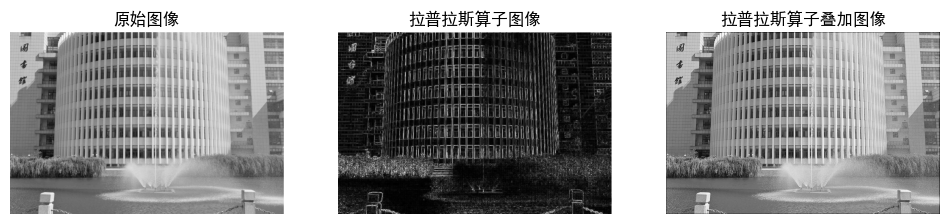

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def sharpen(img):
    # 确保输入图像为灰度图像
    rows, cols = img.shape
    result = np.zeros_like(img)

    # 处理边界内部的像素点
    for row in range(1, rows - 1):
        for col in range(1, cols - 1):
            result[row, col] = np.clip(
                5 * img[row, col] - img[row, col - 1] - img[row, col + 1] - img[row - 1, col] - img[row + 1, col],
                0, 255
            )

    # 处理边界，外围像素点设为0
    result[0, :] = 0
    result[rows - 1, :] = 0
    result[:, 0] = 0
    result[:, cols - 1] = 0

    return result

# 加载彩色图像
lena = cv2.imread("D:/picture/school.png")
# 将彩色图像转换为灰度图像
lena_gray = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
# 应用锐化操作
sharpened_lena = sharpen(lena_gray)

# 使用 OpenCV 拉普拉斯滤波
laplacian_lena = cv2.Laplacian(lena_gray, cv2.CV_16S,ksize=3)
laplacian_lena = np.clip(np.abs(laplacian_lena), 0, 255).astype(np.uint8)

# 显示结果
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(lena_gray, cmap='gray')
plt.title('原始图像')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(laplacian_lena, cmap='gray')
plt.title('拉普拉斯算子图像')
plt.axis('off')


plt.subplot(1, 3, 3)
plt.imshow(sharpened_lena, cmap='gray')
plt.title('拉普拉斯算子叠加图像')
plt.axis('off')

plt.show()


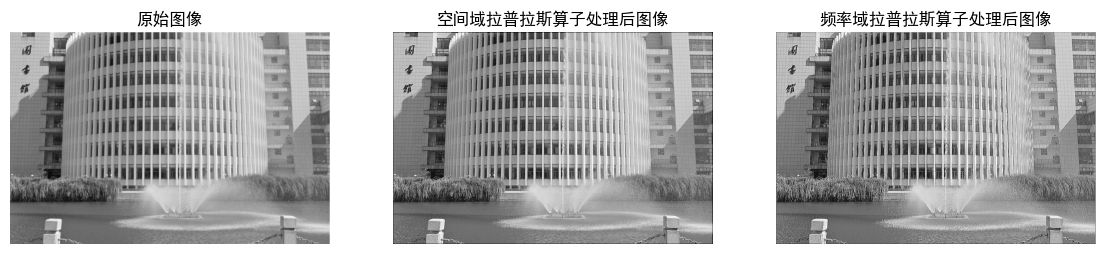

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def sharpen(img):
    # 确保输入图像为灰度图像
    rows, cols = img.shape
    result = np.zeros_like(img)

    # 处理边界内部的像素点
    for row in range(1, rows - 1):
        for col in range(1, cols - 1):
            result[row, col] = np.clip(
                5 * img[row, col] - img[row, col - 1] - img[row, col + 1] - img[row - 1, col] - img[row + 1, col],
                0, 255
            )

    # 处理边界，外围像素点设为0
    result[0, :] = 0
    result[rows - 1, :] = 0
    result[:, 0] = 0
    result[:, cols - 1] = 0

    return result

# 加载彩色图像
lena = cv2.imread("D:/picture/school.png")
# 将彩色图像转换为灰度图像
lena_gray = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
# 应用锐化操作
sharpened_lena = sharpen(lena_gray)

# 使用 OpenCV 拉普拉斯滤波
laplacian_lena = cv2.Laplacian(lena_gray, cv2.CV_16S,ksize=3)
laplacian_lena = np.clip(np.abs(laplacian_lena), 0, 255).astype(np.uint8)

# 显示结果
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题



# 读取图像并转换为灰度图像
im1 = cv2.imread("D:/picture/school.png")
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)

# 进行傅里叶变换并获取频谱，im2double类似于归一化处理，将像素值范围从[0,255]变为[0,1]
img_f = np.fft.fftshift(np.fft.fft2(im1 / 255.0))

# 获取图像的尺寸
m, n = img_f.shape
O_x = m // 2  # 圆心x坐标
O_y = n // 2  # 圆心y坐标

# 求频谱的最大值
a = np.max(np.abs(img_f))

# 定义一个空的频谱图像用于滤波
img = np.zeros((m, n), dtype=complex)

# 拉普拉斯滤波
for j in range(n):
    for i in range(m):
        d = np.sqrt((i - O_x) ** 2 + (j - O_y) ** 2)  # 计算两点之间的距离
        H = -4 * np.pi ** 2 * d ** 2 / a  # 拉普拉斯滤波器
        img[i, j] = (1 - H) * img_f[i, j]  # 应用滤波器

# 逆傅里叶变换并获取实部
img = np.fft.ifftshift(img)
img = np.real(np.fft.ifft2(img))

# 将处理后的图像恢复为uint8类型并显示
img = np.uint8(np.clip(img * 255, 0, 255))





plt.figure(figsize=(14, 12))
plt.subplot(1, 3, 1)
plt.imshow(im1, cmap='gray')
plt.title('原始图像')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sharpened_lena, cmap='gray')
plt.title('空间域拉普拉斯算子处理后图像')
plt.axis('off')

plt.subplot(133)
plt.imshow(img, cmap='gray')
plt.title('频率域拉普拉斯算子处理后图像'),
plt.axis('off')
plt.show()